# Data Wrangling and EDA

In [40]:
# libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.probability import FreqDist
from ar_wordcloud import ArabicWordCloud

## Data Wrangling

In [41]:
# read dataset
df = pd.read_excel("/Users/muneraalrajhi/Desktop/Capstone Project/CapstoneProject/data/Poems.xlsx")
df.head()

,Poem,Number of Versus,Poet,Century,Label,Type,Metre
0,أصابت سهام الحتف يا حسرة الدهرصريح قريش والخلا...,46.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر الطويل
1,جئت يا دهر بالرزية بكراغادرت مهجة الهدى وهي حر...,37.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر الخفيف
2,وشادن أورثني حبهكالائتلافيين حزنا طويلعز علي ا...,14.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر السريع
3,قد كانت الآمال معقودةفيك وللأمال تضليلواليوم ل...,11.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر السريع
4,سواي على الضيم يبقى رهيناوغيري يرى ضارعا مستكي...,87.0,أبو المحاسن الكربلائي,العراق,قصائد عتاب,عموديه,بحر المتقارب


In [42]:
# dataset dimensions  
df.shape

(12587, 7)

In [43]:
# column names
df.columns

Index(['Poem', 'Number of Versus', 'Poet', 'Century', 'Label', 'Type',
       'Metre'],
      dtype='object')

In [44]:
df.nunique()

Poem                12552
Number of Versus      155
Poet                  435
Century                23
Label                   9
Type                    2
Metre                  66
dtype: int64

Data Dictionary:
- Poem: a piece of writing in which the expression of feelings and ideas is given intensity by particular attention to diction (sometimes involving rhyme), rhythm, and imagery.
- Number of Versus: how many line in the poem.
- Poet: name of the poet.
- Century: which century the poem was written.
- Type: the way the powm was written.
- Metre: the basic rhythmic structure of a poem.

In [45]:
# Summary about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12587 entries, 0 to 12586
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Poem              12585 non-null  object 
 1   Number of Versus  12356 non-null  float64
 2   Poet              12587 non-null  object 
 3   Century           12585 non-null  object 
 4   Label             12587 non-null  object 
 5   Type              12587 non-null  object 
 6   Metre             12587 non-null  object 
dtypes: float64(1), object(6)
memory usage: 688.5+ KB


In [46]:
# check for null values
df.isnull().sum()

Poem                  2
Number of Versus    231
Poet                  0
Century               2
Label                 0
Type                  0
Metre                 0
dtype: int64

In [47]:
# chech for duplicates
df.duplicated().sum()

5

First Impression:
- The dataset contains 7 columns and 12587 raws.
- The dataset contains 6 object variables, and 1 float64 variable need to be change to object. 
- The dataset contain 235 null values.
- The dataset have 5 duplicated values.

## handle missing values and duplicates:

<AxesSubplot:>

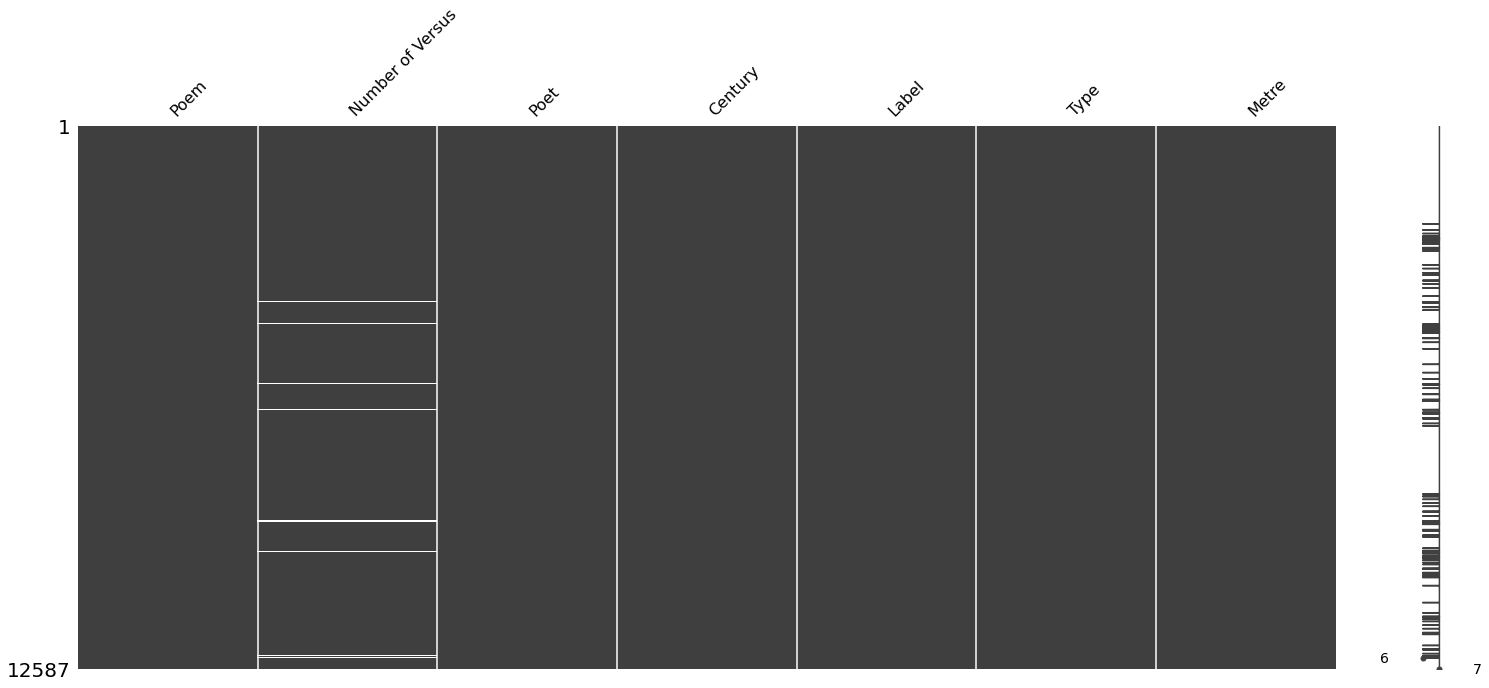

In [48]:
#plot missing values
msno.matrix(df)

In [49]:
#drop missing values
df = df.dropna()

In [50]:
# drop duplicates 
df = df.drop_duplicates()

## Data Cleaning

In [52]:
# Convert Number of Versus type to object and remove the decimal
df['Number of Versus'] = df['Number of Versus'].astype(str).replace('\.0', '', regex=True)

# Remove punctuations from the content 

df['Poem'] = df['Poem'].replace("\xa0"," ", regex=True)
df['Poem'] = df['Poem'].replace('\n'," ", regex=True)
df['Poem'] = df['Poem'].replace("\t"," ", regex=True)
df['Poem'] = df['Poem'].replace("ًٌٍَُِّْ"," ", regex=True)
df['Poem'] = df['Poem'].replace("ًٌٍَُِّْ"," ", regex=True)

# Replac non relative Metre to NaN
df.loc[df['Metre'].str.contains('قافية',na=False), 'Metre'] = np.nan

# Rename the labels 
df["Label"] = df["Label"].replace(['قصائد رثاء'],'رثاء')
df["Label"] = df["Label"].replace(['قصائد مدح'],'مدح')
df["Label"] = df["Label"].replace(['قصائد حزينه'],'حزن')
df["Label"] = df["Label"].replace(['قصائد عتاب'],'عتاب')
df["Label"] = df["Label"].replace(['قصائد شوق'],'شوق')
df["Label"] = df["Label"].replace(['قصائد رومنسيه'],'رومنسيه')
df["Label"] = df["Label"].replace(['قصائد هجاء'],'هجاء')
df["Label"] = df["Label"].replace(['قصائد فراق'],'فراق')
df["Label"] = df["Label"].replace(['قصائد غزل'],'غزل')



In [53]:
df.sample(10)

,Poem,Number of Versus,Poet,Century,Label,Type,Metre
7232,هي الدار موقوف عليك بكاها فلا تعدها يوما تؤم س...,49,الشريف المرتضى,العصر المملوكي,رثاء,عموديه,بحر الطويل
1617,غودرت مذ قيل الفراق غدا ذا حيرة لا أملك الجلدا...,37,الأبله البغدادي,العصر الايوبي,فراق,عموديه,بحر الكامل
7503,لله ظبي بقلبي من حاجبيه نبال يدعونه بحسين في ا...,2,علي الغراب الصفاقسي,العصر العثماني,رومنسيه,عموديه,بحر المجتث
10448,وأجوف معشوق الأنين مخفف تحرك من إطرابنا حركاته...,9,كشاجم,العصر العباسي,شوق,عموديه,بحر الطويل
9986,كم قلت وخطه على الماء نقش ما ضر لو الماء على ن...,2,نظام الدين الأصفهاني,العصر المملوكي,شوق,عموديه,بحر الدوبيت
5304,الجسم تذيبه حقوق الخدمه والقلب عذابه علو الهمه...,2,ابن دقيق العيد,العصر المملوكي,رثاء,عموديه,بحر الدوبيت
7549,قضى الله يا أسماء أن لست زائلا أحبك حتى يغمض ا...,7,الحسين بن مطير الأسدي,العصر العباسي,رومنسيه,عموديه,بحر الطويل
4899,أين البيان عساي أشرح ما بي لك يا شهيد العلم وا...,51,أحمد الكاشف,مصر,رثاء,عموديه,بحر الكامل
6484,أستشعر اليأس من الناس فالروح والراحة في الياس ...,5,أبو هلال العسكري,العصر العباسي,رثاء,عموديه,بحر السريع
4867,بكى الشرق يا خير الصدور الاعاظمعليك بمنهل الدم...,38,أبو المحاسن الكربلائي,العراق,رثاء,عموديه,بحر الطويل


In [62]:
#save the clean dataset
df.to_excel('Poems_Cleaned.xlsx',index=False)

## Data visualization

In [54]:
poemsperlabel = df.groupby('Label').size()
poemsperlabel

Label
حزن        1363
رثاء       2451
رومنسيه    1111
شوق        1295
عتاب       1359
غزل        1358
فراق        910
مدح        1454
هجاء       1047
dtype: int64

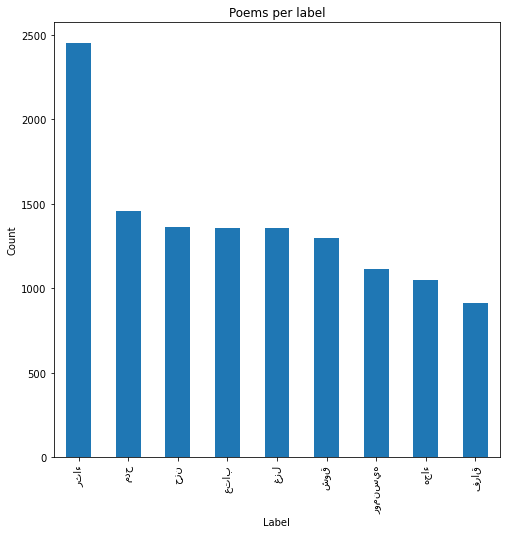

In [55]:
# Number of poems per label
ax = df['Label'].value_counts().plot(kind='bar',figsize=(8,8),title="Poems per label")
ax.set_xlabel('Label')
ax.set_ylabel('Count');

In [56]:
poemsperpoet = df.groupby('Metre').size()
poemsperpoet

Metre
بحر أحذ الكامل         113
بحر البسيط            1691
بحر الخفيف             963
بحر الدوبيت            404
بحر الرجز              286
بحر الرمل              252
بحر السريع             554
بحر السلسلة              4
بحر الطويل            2901
بحر القوما               1
بحر الكامل            1769
بحر المتدارك            17
بحر المتقارب           480
بحر المجتث             148
بحر المديد              68
بحر المضارع              1
بحر المقتضب              4
بحر المنسرح            276
بحر المواليا            15
بحر الهزج               55
بحر الوافر             977
بحر مجزوء البسيط        13
بحر مجزوء الخفيف        58
بحر مجزوء الدوبيت        1
بحر مجزوء الرجز        114
بحر مجزوء الرمل        202
بحر مجزوء السريع         1
بحر مجزوء الطويل         1
بحر مجزوء الكامل       339
بحر مجزوء المتقارب       9
بحر مجزوء المجتث         2
بحر مجزوء المديد         1
بحر مجزوء الوافر        59
بحر مجزوء موشح           3
بحر مخلع البسيط        165
بحر مخلع الكامل          1
بحر مشطور الرجز       

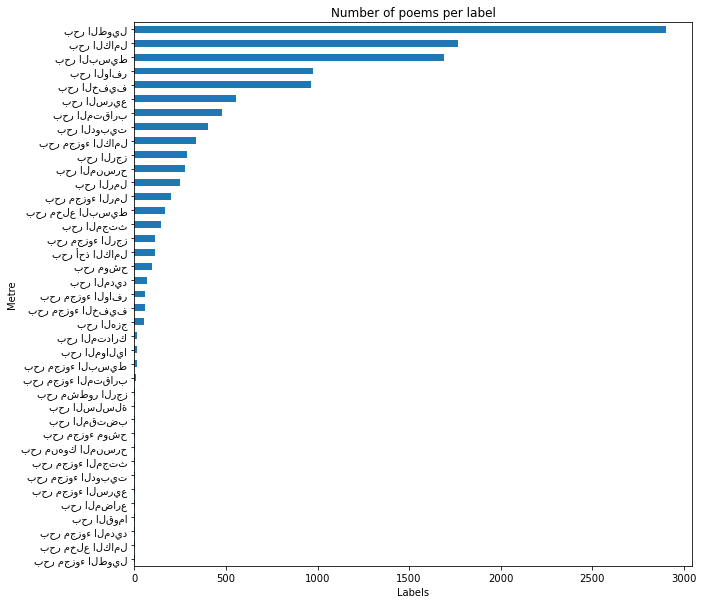

In [57]:
# Number of poems per label
poemsperpoet.sort_values().plot(kind='barh',figsize=(10,10))
plt.title(('Number of poems per label'))
plt.xlabel("Labels");

In [58]:
poemsperCentury = df.groupby('Century').size()
poemsperCentury

Century
الأردن              23
الجزائر             11
السعودية             6
العراق             453
العصر الأندلسي     826
العصر الاسلامي       9
العصر الاموي       799
العصر الايوبي      648
العصر الجاهلي       79
العصر العباسي     3417
العصر العثماني     934
العصر المملوكي    1812
المخضرمون          273
المغرب              49
اليمن               55
تونس               116
سوريا              292
عمان               156
فلسطين              20
لبنان             1010
ليبيا               30
مصر               1325
موريتانيا            5
dtype: int64

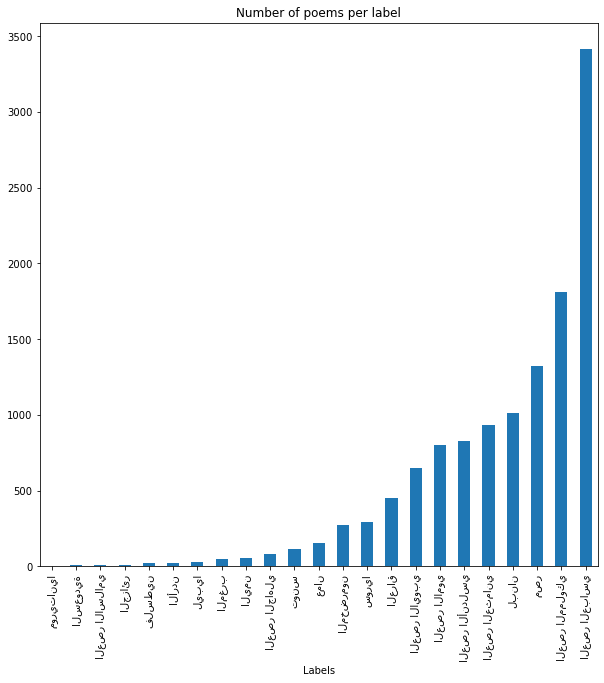

In [59]:
# Number of poems per label
poemsperCentury.sort_values().plot(kind='bar',figsize=(10,10))
plt.title(('Number of poems per label'))
plt.xlabel("Labels");

## NLTK and Text Processing

In [60]:
# Stop Words
nltk.download("stopwords")
arabic_stopwords = set(nltk.corpus.stopwords.words("arabic"))

# Expande Arabic StopWords
data = []
with open('/Users/muneraalrajhi/Desktop/Capstone Project/CapstoneProject/data/arabic_stop_words.txt','r') as myfile:
    for line in myfile:
        data.extend(map(str, line.rstrip('\n').split(',')))
arabic_stopwords.update(data)

# Tokenaization
df['filtered_poems'] = df['Poem'].map(word_tokenize)

# Remove Stop Words
df['filtered_poems']= df['filtered_poems'].apply(lambda x: [item for item in x if item not in arabic_stopwords])

# Arabic Stemmer
st = ISRIStemmer()
df['filtered_poems'] = df['filtered_poems'].apply(lambda x: [st.stem(y) for y in x])

df.sample(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muneraalrajhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Poem,Number of Versus,Poet,Century,Label,Type,Metre,filtered_poems
1948,قالوا الفراق غدا فهل يغنيني عن طول نوحي فيه طو...,12,شاعر الحمراء,المغرب,فراق,عموديه,NaN,"[قال, فرق, فهل, يغن, طول, نوح, طول, حني, اغد, ..."
3978,يا سعيد الدهر يا غيث الأنام يا مليك العصر يا ل...,8,صالح مجدي بك,مصر,مدح,عموديه,بحر الرمل,"[سعد, دهر, غيث, انم, ليك, عصر, ليث, زحم, شعر, ..."
9414,بين أهوال وأخطا ر صباحا ومساء حالة الجندي في ا...,30,إبراهيم الأسطى,ليبيا,حزن,عموديه,بحر مجزوء الرمل,"[هول, أخط, صبح, ساء, حلة, جند, الم, دان, يأس, ..."
4796,أحلت عما عهدت من أدبك أم لك ملكا فتهت في كتبك ...,7,عبدالصمد العبدي,العصر العباسي,مدح,عموديه,بحر المنسرح,"[احل, عهد, ادب, لكا, فته, كتب, ترى, نصف, خون, ..."
4416,لك المبارك من حب وتسليم والصادق الحق من حمد وت...,17,أحمد الكاشف,مصر,مدح,عموديه,بحر البسيط,"[برك, حب, سلم, صدق, لحق, حمد, كرم, دعك, بنء, ق..."
11881,أظهر جمالك للعيون وأبده وصل الوداد لمن رضاك بو...,52,ابن حجر العسقلاني,العصر المملوكي,غزل,عموديه,بحر الكامل,"[ظهر, جمل, عين, أبد, وصل, ودد, لمن, رضك, بود, ..."
4872,يا دار غيرها التقادم والبلى بين السليل ومأزمي ...,4,أبو حية النميري,العصر العباسي,رثاء,عموديه,بحر الكامل,"[دار, غير, قدم, بلى, سلل, أزم, كبد, لزل, خفض, ..."
10954,فؤادي إلى لقياكم الدهر مشتاق وقلب وإن وجد النو...,28,الأمير الصنعاني,العصر العثماني,شوق,عموديه,بحر الطويل,"[فؤد, لقا, دهر, شتق, قلب, نوى, خفق, وعن, جرت, ..."
2690,فتى لا يبالي المدلجون بنوره إلى ما به ألا تضيء...,2,أبو الطمحان القيني,المخضرمون,هجاء,عموديه,بحر الطويل,"[فتى, يبل, دلج, بنر, تضء, ككب, حجب, امر, يشن, ..."
5160,جاءني يحلف أي أن ي محب وشفيق يظهر البر وفي الب...,20,الخطيب الحصكفي,العصر المملوكي,رثاء,عموديه,بحر مجزوء الكامل,"[جاء, حلف, محب, شفق, ظهر, لبر, الب, طن, خبث, ع..."


In [61]:
#save the clean dataset
df.to_excel('Poems_Cleaned_TopicModeling.xlsx',index=False)

In [62]:
# calculate the most 50 common words
fdist1 = FreqDist(sum(df['filtered_poems'], []))

In [63]:
fdist1.most_common(50)

[('قلب', 6280),
 ('علم', 4110),
 ('حسن', 3827),
 ('دهر', 3724),
 ('كرم', 3656),
 ('بعد', 3639),
 ('ليل', 3504),
 ('دمع', 3378),
 ('عين', 3336),
 ('نفس', 3194),
 ('سلم', 3081),
 ('فضل', 2962),
 ('ذكر', 2900),
 ('امر', 2810),
 ('فرق', 2686),
 ('قبل', 2674),
 ('بدر', 2657),
 ('علي', 2568),
 ('هوى', 2565),
 ('سعد', 2560),
 ('حمد', 2558),
 ('نظر', 2540),
 ('زمن', 2472),
 ('خلق', 2430),
 ('وجد', 2372),
 ('عرف', 2370),
 ('جمع', 2335),
 ('كنت', 2314),
 ('وصل', 2280),
 ('قوم', 2257),
 ('شمس', 2255),
 ('ناس', 2233),
 ('لقد', 2197),
 ('خير', 2147),
 ('ملك', 2127),
 ('ارض', 2122),
 ('وجه', 2103),
 ('شعر', 2074),
 ('صبح', 2045),
 ('مجد', 2042),
 ('عند', 2032),
 ('عهد', 2007),
 ('جمل', 2000),
 ('عمر', 1998),
 ('بين', 1951),
 ('بحر', 1947),
 ('قرب', 1926),
 ('حكم', 1905),
 ('ورد', 1905),
 ('عرض', 1897)]

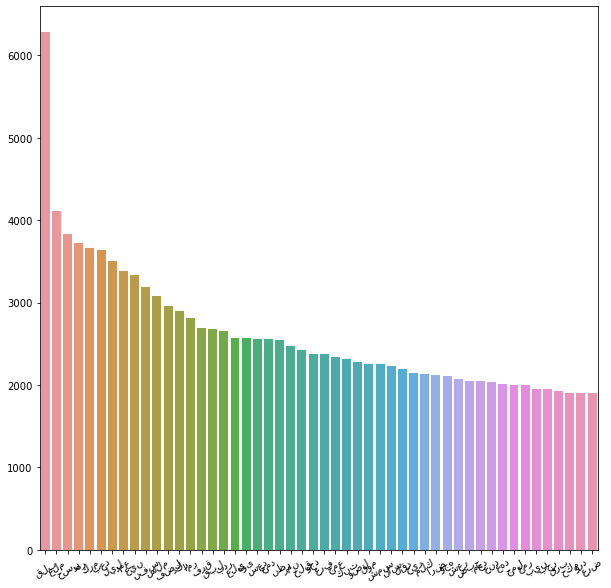

In [69]:
#the 50 most common word viz
all_fdist = fdist1.most_common(50)

all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(10,10))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

In [64]:
commonwords = str(fdist1.most_common(50))

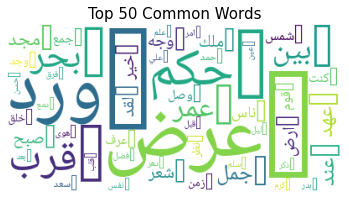

In [68]:
# Word Cloud viz
awc = ArabicWordCloud( background_color = 'white').generate(commonwords)
wc = awc.from_text(commonwords)
plt.imshow(wc)
plt.axis("off")
plt.title('Top 50 Common Words', fontsize=15);

Source:
    NLTK book Chapter1 Language Processing and Python:
            https://www.nltk.org/book/ch01.html